## Cycle 2 Iteration 3 description 

As I noticed the accuracy increased with each epoch in Cycle 2 Iteration 1, I decided to increase the number of epochs to 30 to understand the effect. 

## Import libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Import CSV

In [2]:
df = pd.read_csv('tweet_emotions.csv')
df

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


## Preprocessing 

In [3]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/962842564.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


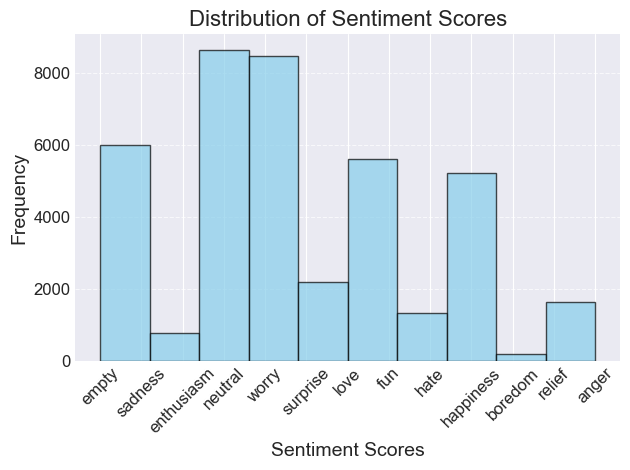

In [4]:
# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram
plt.hist(df['sentiment'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sentiment Scores', fontsize=16)

# Add grid and adjust tick parameters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [5]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

Author note: This data is imbalanced. 

Author note: Guidance to reduce the number of emotion groups 

Author note: In order to guide the workload of a Customer Success Manager, the following grouping would make sense: 

Positive Sentiments:

- happiness
- love
- relief
- enthusiasm

Neutral Sentiments:

- neutral
- surprise
- fun

Negative Sentiments:

- worry
- sadness
- hate
- empty
- boredom
- anger

In [6]:
# Define a function to map sentiments to sub-groups
def map_sentiment_to_subgroup(sentiment):
    if sentiment in ['empty', 'sadness', 'worry', 'hate', 'boredom', 'anger']:
        return 'Negative'
    elif sentiment in ['neutral', 'surprise', 'fun']:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the function to create a new column for sub-groups
df['sentiment_subgroup'] = df['sentiment'].apply(map_sentiment_to_subgroup)

df

,tweet_id,sentiment,content,sentiment_subgroup
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Negative
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Negative
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,Neutral
39996,1753919001,love,Happy Mothers Day All my love,Positive
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,Positive


In [7]:
df['sentiment_subgroup'].value_counts()

sentiment_subgroup
Negative    16063
Neutral     12601
Positive    11336
Name: count, dtype: int64

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/2723297244.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


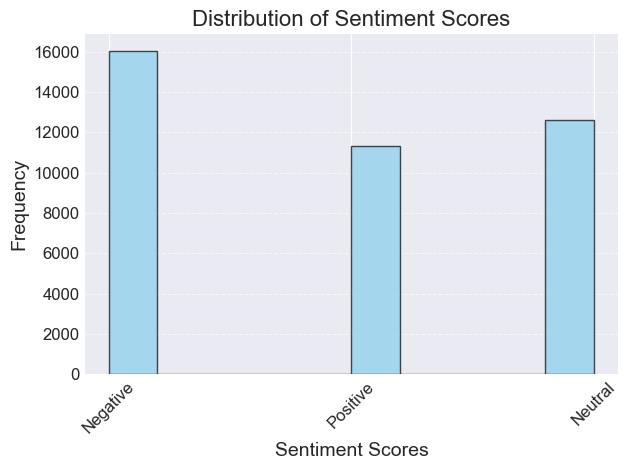

In [8]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Create the histogram
plt.hist(df['sentiment_subgroup'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sentiment Scores', fontsize=16)

# Add grid and adjust tick parameters
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels by 45 degrees
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [9]:
# Check for null values 

print(df.isnull().sum())

tweet_id              0
sentiment             0
content               0
sentiment_subgroup    0
dtype: int64


In [10]:
# Check for duplicates 

duplicate_rows = df[df.duplicated()]
duplicate_rows.value_counts()

Series([], Name: count, dtype: int64)

### Remove names from content column before tokenizing 

Author note: As we know that any word beginning with @ is a name, we can assume that these words will not be useful predictors of sentiment. As such, I have chosen to delete all @ words prior to tokenizing. 

In [11]:
# Remove words starting with '@' using a lambda function
df['content'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [12]:
df['content']

0        i know i was listenin to bad habit earlier and...
1        Layin n bed with a headache ughhhh...waitin on...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        We want to trade with someone who has Houston ...
                               ...                        
39995                                                     
39996                        Happy Mothers Day All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...
39999    bullet train from tokyo the gf and i have been...
Name: content, Length: 40000, dtype: object

## Tokenizing

In [13]:
import nltk # Natural Language Toolkit
from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Ensure that you have the 'punkt' tokenizer models downloaded

# Tokenize the text in the 'content' column
df['tokens'] = df['content'].apply(word_tokenize)

# Display the DataFrame with tokens
print(df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/matthewbatchelor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     tweet_id   sentiment                                            content  \
0  1956967341       empty  i know i was listenin to bad habit earlier and...   
1  1956967666     sadness  Layin n bed with a headache ughhhh...waitin on...   
2  1956967696     sadness                Funeral ceremony...gloomy friday...   
3  1956967789  enthusiasm               wants to hang out with friends SOON!   
4  1956968416     neutral  We want to trade with someone who has Houston ...   

  sentiment_subgroup                                             tokens  
0           Negative  [i, know, i, was, listenin, to, bad, habit, ea...  
1           Negative  [Layin, n, bed, with, a, headache, ughhhh, ......  
2           Negative      [Funeral, ceremony, ..., gloomy, friday, ...]  
3           Positive     [wants, to, hang, out, with, friends, SOON, !]  
4            Neutral  [We, want, to, trade, with, someone, who, has,...  


Author note: This code will tokenize each text instance in the 'content' column and store the tokens in a new column called 'tokens' in the DataFrame

In [14]:
df

,tweet_id,sentiment,content,sentiment_subgroup,tokens
0,1956967341,empty,i know i was listenin to bad habit earlier and...,Negative,"[i, know, i, was, listenin, to, bad, habit, ea..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on...,Negative,"[Layin, n, bed, with, a, headache, ughhhh, ......"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Negative,"[Funeral, ceremony, ..., gloomy, friday, ...]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,"[wants, to, hang, out, with, friends, SOON, !]"
4,1956968416,neutral,We want to trade with someone who has Houston ...,Neutral,"[We, want, to, trade, with, someone, who, has,..."
...,...,...,...,...,...
39995,1753918954,neutral,,Neutral,[]
39996,1753919001,love,Happy Mothers Day All my love,Positive,"[Happy, Mothers, Day, All, my, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive,"[Happy, Mother, 's, Day, to, all, the, mommies..."
39998,1753919043,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...,Positive,"[WASSUP, BEAUTIFUL, !, !, !, FOLLOW, ME, !, !,..."


In [15]:
df['tokens']

0        [i, know, i, was, listenin, to, bad, habit, ea...
1        [Layin, n, bed, with, a, headache, ughhhh, ......
2            [Funeral, ceremony, ..., gloomy, friday, ...]
3           [wants, to, hang, out, with, friends, SOON, !]
4        [We, want, to, trade, with, someone, who, has,...
                               ...                        
39995                                                   []
39996                 [Happy, Mothers, Day, All, my, love]
39997    [Happy, Mother, 's, Day, to, all, the, mommies...
39998    [WASSUP, BEAUTIFUL, !, !, !, FOLLOW, ME, !, !,...
39999    [bullet, train, from, tokyo, the, gf, and, i, ...
Name: tokens, Length: 40000, dtype: object

## Preprocessing tokenized text data

- Lowercasing: Convert all words to lowercase to ensure consistency and prevent the model from treating words with different cases as different entities.

- Removing punctuation: Remove punctuation marks such as commas, periods, and quotation marks. Punctuation generally does not carry semantic meaning and can introduce noise into the embeddings.

- Removing stop words: As mentioned earlier, stop words are common words such as "the," "is," and "and" that occur frequently but typically do not contribute much to the meaning of the text. Removing them can reduce the dimensionality of the data and improve the efficiency of the Word2Vec model.

- Handling numerical values: Depending on the specific use case, you may choose to remove or replace numerical values with placeholders. In some cases, numerical values may not be relevant to the semantics of the text and can be treated as noise.

- Removing blank spaces: Should be treated as noise and deleted 

- Handling special characters: Special characters, symbols, and emojis may need to be handled appropriately based on the specific requirements of the application. You might choose to remove them, replace them with special tokens, or even treat them as separate entities

- Removing blank rows

- Removing words with just one letter: These are stealth stop words 

- Token normalization: This involves techniques such as stemming or lemmatization to reduce words to their base or root forms. For example, "running," "runs," and "ran" may all be reduced to the base form "run." This helps in capturing semantic similarities between related words.

- Handling out-of-vocabulary words: It's essential to handle words that are not present in the vocabulary of the Word2Vec model. This could involve techniques like using subword embeddings (e.g., FastText) or replacing unknown words with a special token.



### Lowercasing

Convert all words to lowercase to ensure consistency and prevent the model from treating words with different cases as different entities.

In [16]:
# Function to lowercase each word in a list of tokens
def lowercase_tokens(tokens_list):
    return [word.lower() for word in tokens_list]

# Apply lowercase conversion to each list of tokens in the 'tokens' column
df.loc[:, 'tokens'] = df['tokens'].apply(lowercase_tokens)

In [17]:
df['tokens']

0        [i, know, i, was, listenin, to, bad, habit, ea...
1        [layin, n, bed, with, a, headache, ughhhh, ......
2            [funeral, ceremony, ..., gloomy, friday, ...]
3           [wants, to, hang, out, with, friends, soon, !]
4        [we, want, to, trade, with, someone, who, has,...
                               ...                        
39995                                                   []
39996                 [happy, mothers, day, all, my, love]
39997    [happy, mother, 's, day, to, all, the, mommies...
39998    [wassup, beautiful, !, !, !, follow, me, !, !,...
39999    [bullet, train, from, tokyo, the, gf, and, i, ...
Name: tokens, Length: 40000, dtype: object

### Removing punctuation

Remove punctuation marks such as commas, periods, and quotation marks. Punctuation generally does not carry semantic meaning and can introduce noise into the embeddings. This code first checks if the value is a string before applying the regex substitution. If the value is not a string (e.g., NaN or float), it returns an empty string. This ensures that the re.sub function receives only string inputs, avoiding the TypeError.

In [18]:
import re

# Apply punctuation removal using a lambda function
df['tokens'] = df['tokens'].apply(lambda tokens_list: [re.sub(r'[^\w\s]', '', word) for word in tokens_list] if isinstance(tokens_list, list) else [])

In [19]:
df['tokens']

0        [i, know, i, was, listenin, to, bad, habit, ea...
1        [layin, n, bed, with, a, headache, ughhhh, , w...
2                  [funeral, ceremony, , gloomy, friday, ]
3            [wants, to, hang, out, with, friends, soon, ]
4        [we, want, to, trade, with, someone, who, has,...
                               ...                        
39995                                                   []
39996                 [happy, mothers, day, all, my, love]
39997    [happy, mother, s, day, to, all, the, mommies,...
39998    [wassup, beautiful, , , , follow, me, , , peep...
39999    [bullet, train, from, tokyo, the, gf, and, i, ...
Name: tokens, Length: 40000, dtype: object

### Removing stop-words 

Stop words are common words such as "the," "is," and "and" that occur frequently but typically do not contribute much to the meaning of the text. Removing them can reduce the dimensionality of the data and improve the efficiency of the Word2Vec model.

In [20]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Get the English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'tokens' column
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthewbatchelor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df['tokens']

0        [know, listenin, bad, habit, earlier, started,...
1        [layin, n, bed, headache, ughhhh, , waitin, ca...
2                  [funeral, ceremony, , gloomy, friday, ]
3                           [wants, hang, friends, soon, ]
4        [want, trade, someone, houston, tickets, , one, ]
                               ...                        
39995                                                   []
39996                          [happy, mothers, day, love]
39997    [happy, mother, day, mommies, , woman, man, lo...
39998    [wassup, beautiful, , , , follow, , , peep, ne...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: tokens, Length: 40000, dtype: object

### Removing blank spaces

Author note: Based on the print out of the tokens column above, I can see some blank spaces (' '). I will remove these to reduce noise in my model 

In [22]:
# Remove blank spaces from the list of tokens
df['tokens'] = df['tokens'].apply(lambda tokens_list: [token for token in tokens_list if token.strip() != ''])

# Display the updated DataFrame
print(df['tokens'])

0        [know, listenin, bad, habit, earlier, started,...
1          [layin, n, bed, headache, ughhhh, waitin, call]
2                      [funeral, ceremony, gloomy, friday]
3                             [wants, hang, friends, soon]
4            [want, trade, someone, houston, tickets, one]
                               ...                        
39995                                                   []
39996                          [happy, mothers, day, love]
39997    [happy, mother, day, mommies, woman, man, long...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: tokens, Length: 40000, dtype: object


### Handling numerical values

This code will remove all tokens containing only numerical values from the 'tokens' column.

In [23]:
df['tokens'] = df['tokens'].apply(lambda x: [token for token in x if not token.isdigit()])

In [24]:
df['tokens']

0        [know, listenin, bad, habit, earlier, started,...
1          [layin, n, bed, headache, ughhhh, waitin, call]
2                      [funeral, ceremony, gloomy, friday]
3                             [wants, hang, friends, soon]
4            [want, trade, someone, houston, tickets, one]
                               ...                        
39995                                                   []
39996                          [happy, mothers, day, love]
39997    [happy, mother, day, mommies, woman, man, long...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: tokens, Length: 40000, dtype: object

### Handling special characters

This code will remove all non-alphanumeric characters from each token in the 'tokens' column of your DataFrame.

In [25]:
df['tokens'] = df['tokens'].apply(lambda x: [re.sub(r'\W', '', token) for token in x])

In [26]:
df['tokens']

0        [know, listenin, bad, habit, earlier, started,...
1          [layin, n, bed, headache, ughhhh, waitin, call]
2                      [funeral, ceremony, gloomy, friday]
3                             [wants, hang, friends, soon]
4            [want, trade, someone, houston, tickets, one]
                               ...                        
39995                                                   []
39996                          [happy, mothers, day, love]
39997    [happy, mother, day, mommies, woman, man, long...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: tokens, Length: 40000, dtype: object

### Removing blank rows   

In the print-out above, I see cases (such as ID 39995) where the row is blank '[]'. These may add noise to the model and I will remove. 

In [27]:
# Count the number of rows before removing blank rows
num_rows_before = len(df)

# Remove rows with blank lists in the 'tokens' column
df = df[df['tokens'].apply(lambda tokens_list: tokens_list != [])]

# Count the number of rows after removing blank rows
num_rows_after = len(df)

# Calculate the number of rows deleted
num_rows_deleted = num_rows_before - num_rows_after

# Print the number of rows deleted
print("Number of rows deleted:", num_rows_deleted)

Number of rows deleted: 216


### Removing words with just one letter

These are hidden stop-words

In [28]:
# Define the target words to count
target_words = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Initialize counts for each target word
word_counts = {word: 0 for word in target_words}

# Iterate over the tokens and count occurrences of target words
for tokens_list in df['tokens']:
    for word in tokens_list:
        for target_word in target_words:
            if target_word == word:
                word_counts[target_word] += 1
            elif target_word.strip() == word:
                word_counts[target_word] += 1

# Print the word counts
for word, count in word_counts.items():
    print(f"Occurrences of '{word}': {count}")

Occurrences of 'a': 0
Occurrences of 'b': 137
Occurrences of 'c': 86
Occurrences of 'd': 0
Occurrences of 'e': 41
Occurrences of 'f': 37
Occurrences of 'g': 27
Occurrences of 'h': 17
Occurrences of 'i': 0
Occurrences of 'j': 24
Occurrences of 'k': 48
Occurrences of 'l': 50
Occurrences of 'm': 0
Occurrences of 'n': 248
Occurrences of 'o': 0
Occurrences of 'p': 123
Occurrences of 'q': 18
Occurrences of 'r': 164
Occurrences of 's': 0
Occurrences of 't': 0
Occurrences of 'u': 1354
Occurrences of 'v': 39
Occurrences of 'w': 151
Occurrences of 'x': 301
Occurrences of 'y': 0
Occurrences of 'z': 8


In [29]:
# Delete occurrences of target_words from df['tokens']
df['tokens'] = df['tokens'].apply(lambda tokens_list: [word for word in tokens_list if word not in target_words and word.strip() not in target_words])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/3323392164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda tokens_list: [word for word in tokens_list if word not in target_words and word.strip() not in target_words])


In [30]:
df['tokens']

0        [know, listenin, bad, habit, earlier, started,...
1             [layin, bed, headache, ughhhh, waitin, call]
2                      [funeral, ceremony, gloomy, friday]
3                             [wants, hang, friends, soon]
4            [want, trade, someone, houston, tickets, one]
                               ...                        
39994                      [succesfully, following, tayla]
39996                          [happy, mothers, day, love]
39997    [happy, mother, day, mommies, woman, man, long...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: tokens, Length: 39784, dtype: object

### Token normalization

This involves techniques such as stemming or lemmatization to reduce words to their base or root forms. For example, "running," "runs," and "ran" may all be reduced to the base form "run." This helps in capturing semantic similarities between related words.

In [31]:
from nltk.stem import PorterStemmer

# Initialize PorterStemmer
stemmer = PorterStemmer()

# Apply stemming to tokens
df['tokens'] = df['tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/1729550754.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['tokens'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))


In [32]:
df

,tweet_id,sentiment,content,sentiment_subgroup,tokens
0,1956967341,empty,i know i was listenin to bad habit earlier and...,Negative,know listenin bad habit earlier start freakin ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on...,Negative,layin bed headach ughhhh waitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Negative,funer ceremoni gloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,want hang friend soon
4,1956968416,neutral,We want to trade with someone who has Houston ...,Neutral,want trade someon houston ticket one
...,...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,Positive,succes follow tayla
39996,1753919001,love,Happy Mothers Day All my love,Positive,happi mother day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive,happi mother day mommi woman man long momma so...
39998,1753919043,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...,Positive,wassup beauti follow peep new hit singl wwwmys...


### Handling out-of-vocabulary words

Author note: It seemed I couldn't do this until I had trained a Word2Vec model 

## Reset index 

In [33]:
df.reset_index(drop=True, inplace=True)

## Check preprocessed df

In [34]:
df

,tweet_id,sentiment,content,sentiment_subgroup,tokens
0,1956967341,empty,i know i was listenin to bad habit earlier and...,Negative,know listenin bad habit earlier start freakin ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on...,Negative,layin bed headach ughhhh waitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Negative,funer ceremoni gloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,want hang friend soon
4,1956968416,neutral,We want to trade with someone who has Houston ...,Neutral,want trade someon houston ticket one
...,...,...,...,...,...
39779,1753918900,happiness,Succesfully following Tayla!!,Positive,succes follow tayla
39780,1753919001,love,Happy Mothers Day All my love,Positive,happi mother day love
39781,1753919005,love,Happy Mother's Day to all the mommies out ther...,Positive,happi mother day mommi woman man long momma so...
39782,1753919043,happiness,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NE...,Positive,wassup beauti follow peep new hit singl wwwmys...


## Word embedding 

In [35]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

# Tokenize text in the 'content' column
df['tokens'] = df['content'].apply(word_tokenize)

# Load pre-trained Word2Vec model 
word2vec_model = Word2Vec(df['tokens'], min_count=1)

# Function to apply word embeddings
def apply_word_embeddings(tokens):
    word_vectors = []
    for token in tokens:
        if token in word2vec_model.wv:
            word_vector = word2vec_model.wv[token]  # Get word vector
            word_vectors.append(word_vector)
    if word_vectors:
        tweet_vector = np.mean(word_vectors, axis=0)  # Aggregate word vectors
        return tweet_vector
    else:
        return None

# Apply word embeddings to the 'tokens' column
df['word_embeddings'] = df['tokens'].apply(apply_word_embeddings)

# Drop rows with None values in 'word_embeddings' column
df = df.dropna(subset=['word_embeddings'])

/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/2251675765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['content'].apply(word_tokenize)
/var/folders/cr/qlkb4cqn3vn0pb1jrc5s04800000gn/T/ipykernel_9207/2251675765.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_embeddings'] = df['tokens'].apply(apply_word_embeddings)


In [36]:
df.head()

,tweet_id,sentiment,content,sentiment_subgroup,tokens,word_embeddings
0,1956967341,empty,i know i was listenin to bad habit earlier and...,Negative,"[i, know, i, was, listenin, to, bad, habit, ea...","[-0.12726037, 0.698397, -0.23790373, 0.4721172..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin on...,Negative,"[Layin, n, bed, with, a, headache, ughhhh, ......","[-0.27722132, 0.5931444, -0.016292753, 0.11980..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Negative,"[Funeral, ceremony, ..., gloomy, friday, ...]","[-0.09479669, 0.5384953, -0.025269656, 0.27730..."
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Positive,"[wants, to, hang, out, with, friends, SOON, !]","[-0.6055963, 0.6978202, 0.09877061, 0.13658676..."
4,1956968416,neutral,We want to trade with someone who has Houston ...,Neutral,"[We, want, to, trade, with, someone, who, has,...","[-0.3797439, 0.9407027, 0.19325829, 0.32740754..."


In [37]:
from sklearn.preprocessing import LabelEncoder

# Drop columns except 'sentiment_subgroup' and word embeddings
columns_to_keep = ['sentiment_subgroup', 'word_embeddings']
df = df[columns_to_keep]

# Convert 'sentiment_subgroup' into numeric values
label_encoder = LabelEncoder()
df['sentiment_subgroup'] = label_encoder.fit_transform(df['sentiment_subgroup'])

# Display the first few rows of the modified DataFrame
print(df.head())

   sentiment_subgroup                                    word_embeddings
0                   0  [-0.12726037, 0.698397, -0.23790373, 0.4721172...
1                   0  [-0.27722132, 0.5931444, -0.016292753, 0.11980...
2                   0  [-0.09479669, 0.5384953, -0.025269656, 0.27730...
3                   2  [-0.6055963, 0.6978202, 0.09877061, 0.13658676...
4                   1  [-0.3797439, 0.9407027, 0.19325829, 0.32740754...


## Train test split and model training 

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Assuming 'df' contains the DataFrame with columns 'sentiment_subgroup' and 'word_embeddings'

# Splitting the data into features (X) and target (y)
X = np.array(df['word_embeddings'].tolist())  # Convert word embeddings to numpy array
y = np.array(df['sentiment_subgroup'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes for sentiment_subgroup
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Predictions
y_train_prob = model.predict(X_train)
y_test_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
y_train_pred = np.argmax(y_train_prob, axis=1)
y_test_pred = np.argmax(y_test_prob, axis=1)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the metrics
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)

2024-03-05 10:11:49.604625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/30
796/796 [==============================] - 3s 3ms/step - loss: 1.0747 - accuracy: 0.4591 - val_loss: 1.0114 - val_accuracy: 0.4961
Epoch 2/30
796/796 [==============================] - 2s 2ms/step - loss: 1.0207 - accuracy: 0.4817 - val_loss: 1.0115 - val_accuracy: 0.4925
Epoch 3/30
796/796 [==============================] - 2s 2ms/step - loss: 1.0094 - accuracy: 0.4942 - val_loss: 1.0021 - val_accuracy: 0.5072
Epoch 4/30
796/796 [==============================] - 2s 3ms/step - loss: 1.0053 - accuracy: 0.5005 - val_loss: 0.9982 - val_accuracy: 0.5085
Epoch 5/30
796/796 [==============================] - 2s 2ms/step - loss: 1.0019 - accuracy: 0.5024 - val_loss: 0.9992 - val_accuracy: 0.5005
Epoch 6/30
796/796 [==============================] - 2s 2ms/step - loss: 0.9978 - accuracy: 0.5069 - val_loss: 0.9967 - val_accuracy: 0.5052
Epoch 7/30
796/796 [==============================] - 2s 2ms/step - loss: 0.9970 - accuracy: 0.5057 - val_loss: 0.9960 - val_accuracy: 0.5118
Epoch 

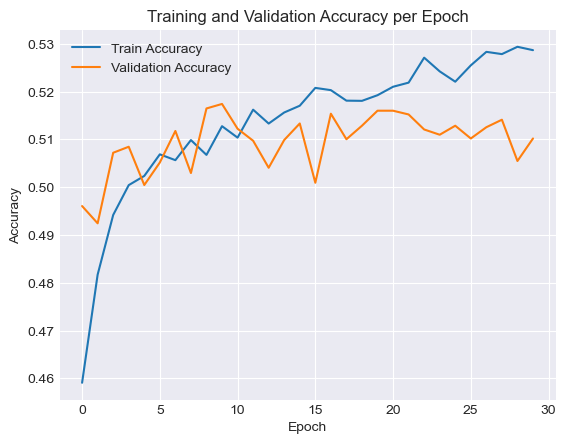

In [39]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy per Epoch')
plt.legend()
plt.show()

## Explanation of model 

The code provided above is using a neural network for training and making predictions. It utilizes TensorFlow, a popular deep learning framework, to define and train the neural network model. The model architecture is defined using the Sequential API from TensorFlow, which allows you to create a sequential stack of layers in your neural network.

Here's a breakdown of the neural network-related parts in the code:

- Defining the Model: The neural network model is defined using tf.keras.Sequential. In the provided code, it consists of two dense layers with ReLU activation functions and a dropout layer to prevent overfitting.

- Compiling the Model: After defining the model, it is compiled using model.compile(), where you specify the optimizer, loss function, and metrics to use during training.

- Training the Model: The model is trained using model.fit(), where you pass the training data (X_train and y_train) along with the number of epochs and batch size.

- Making Predictions: After training, predictions are made using the trained model. In the code, predictions are made using the predict() method, which returns the predicted probabilities for each class. Then, the class with the highest probability is chosen as the predicted class.

- Evaluating the Model: Finally, the performance of the model is evaluated using various metrics such as accuracy, precision, recall, and F1-score on both the training and test sets.

Overall, the provided code demonstrates the process of building, training, and evaluating a neural network model using TensorFlow for a classification task.

## Why do I standardize the features in this model? 

Overall, standardizing features before training a neural network helps improve the stability, convergence speed, and generalization performance of the model, making it an essential preprocessing step in many machine learning tasks.